# K-means Clustering

## Importing Libraries

In [92]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

from sklearn.datasets import make_blobs

# metrics
from sklearn.metrics import silhouette_score

# Plotting library
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

In [93]:
def findClosestCentroids(X, centroids):
    """
    Computes the centroid memberships for every example.
    
    Parameters
    ----------
    X : array_like
        The dataset of size (m, n) where each row is a single example. 
        That is, we have m examples each of n dimensions.
        
    centroids : array_like
        The k-means centroids of size (K, n). K is the number
        of clusters, and n is the the data dimension.
    
    Returns
    -------
    idx : array_like
        A vector of size (m, ) which holds the centroids assignment for each
        example (row) in the dataset X.
    
    Instructions
    ------------
    Go over every example, find its closest centroid, and store
    the index inside `idx` at the appropriate location.
    Concretely, idx[i] should contain the index of the centroid
    closest to example i. Hence, it should be a value in the 
    range 0..K-1
 
    """
    K = centroids.shape[0]
    m = X.shape[0]
    distances = np.zeros((m,K))
    idx=np.zeros((m,1)).astype(np.int16)
    
    for i in range(K):
        
        distances[:,i] = np.linalg.norm(X - centroids[i],axis=1)
        
    idx = np.argmin(distances,axis=1)
    
    return idx

In [94]:
def computeCentroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.
    
    Parameters
    ----------
    X : array_like
        The datset where each row is a single data point. That is, it 
        is a matrix of size (m, n) where there are m datapoints each
        having n dimensions. 
    
    idx : array_like 
        A vector (size m) of centroid assignments (i.e. each entry in range [0 ... K-1])
        for each example.
    
    K : int
        Number of clusters
    
    Returns
    -------
    centroids : array_like
        A matrix of size (K, n) where each row is the mean of the data 
        points assigned to it.
    
    Instructions
    ------------
    Go over every centroid and compute mean of all points that
    belong to it. Concretely, the row vector centroids[i, :]
    should contain the mean of the data points assigned to
    cluster i.

    Note:
    -----
    You can use a for-loop over the centroids to compute this.
    """

    m,n = X.shape
    centroids = np.zeros((K,n))
    
    
    for i in range(K):
        # caculating the centroids by computing the mean of points in each cluster
        centroids[i, :] = np.mean(X[idx==i],axis=0)

    return centroids

In [95]:
def kMeansInitCentroids(X, K):
    
    """
    This function initializes K centroids that are to be used in K-means on the dataset X.
    
    Parameters
    ----------
    X : array_like 
        The dataset of size (m x n).
    
    K : int
        The number of clusters.
    
    Returns
    -------
    centroids : array_like
        Centroids of the clusters. This is a matrix of size (K x n).
    
    Instructions
    ------------
    You should set centroids to randomly chosen encoded_datasamples from the dataset encoded_data.
    """
    
    m, n = X.shape
    centroids = np.zeros((K, n))
    idx = np.random.choice(m, K, replace=False)   # randomly sample K indices without replacement
    centroids = X[idx]
    
    return centroids

In [96]:
def k_means(X,K,max_iterations=100):
    """
    This function gives the label of each data point in the dataset.
    
    Parameters
    ----------
    X : array_like
        The dataset of size (m x n).
    
    K : int
        The number of clusters.
        
    max_iterations : int
        The number of applied iterations.(default = 100)
    
    Returns
    -------
    idx : array_like
        Corresponding cluster of each data point. This is a matrix of size (m x 1).
    """
    threshold = 1e-6
    
    centroids = kMeansInitCentroids(X, K)
    centroids_prev = centroids
    
    for i in range(max_iterations):
        
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
        
        if np.linalg.norm(centroids-centroids_prev) < threshold:
            print(f'converged at iteration {i}')
            break
            
        centroids_prev=centroids
        


    return idx

In [97]:
def predict(centroids,x):
    
    label  = findClosestCentroids(x, centroids)

    return label[0]

## Loading the Dataset

In [117]:
# Generate synthetic data using make_blobs
X, y = make_blobs(n_features=1, n_samples=100, centers=2, random_state=7)

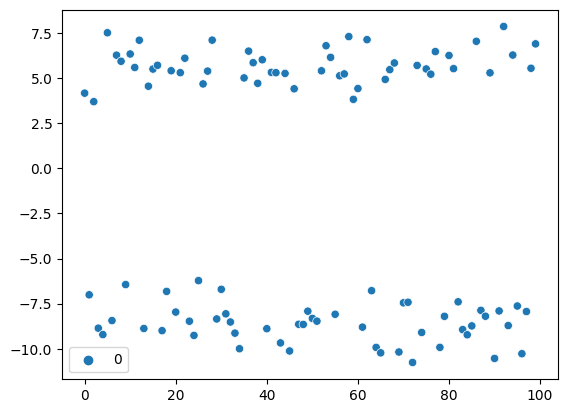

In [118]:
sns.scatterplot(X);

In [119]:
# Use t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

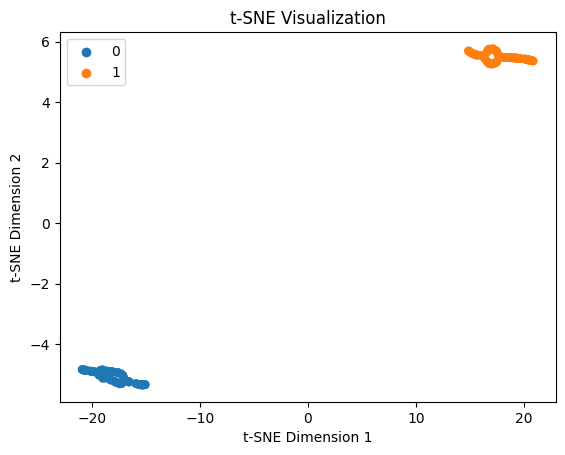

In [120]:
# Visualize the data points with their corresponding cluster assignments
t_sne_1 = X_tsne[:,0]
t_sne_2 = X_tsne[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2,hue = y, palette="tab10", edgecolor=None)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

In [102]:
# Fit the K-means algorithm
labels = k_means(X , K=2, max_iterations=150)

converged at iteration 2


In [103]:
silhouette_avg = silhouette_score(X, labels)

print(f"The average silhouette score is: {round(silhouette_avg,3)}%")

The average silhouette score is: 0.918%


In [104]:
# Use t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

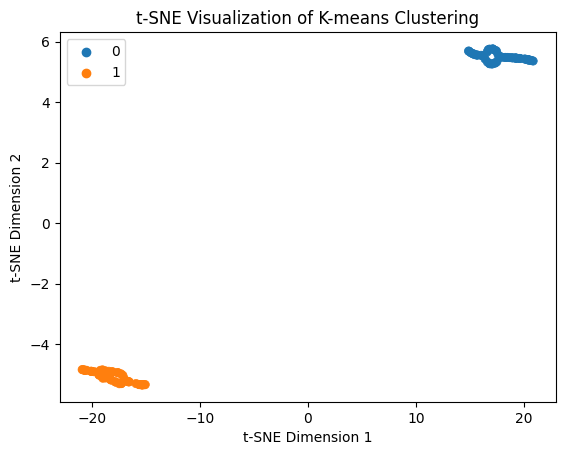

In [105]:
# Visualize the data points with their corresponding cluster assignments
t_sne_1 = X_tsne[:,0]
t_sne_2 = X_tsne[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2,hue = labels, palette="tab10", edgecolor=None)
plt.title('t-SNE Visualization of K-means Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

## Integrating all functions Into a class

In [138]:
class K_means():
    
    def __init__(self,X,K):
        self.X = X
        self.K = K
        self.centroids = self.kMeansInitCentroids()
        self.idx = np.zeros((self.X.shape[0],1))
        
    def kMeansInitCentroids(self):
        m, n = self.X.shape
        centroids = np.zeros((self.K, n))
        idx = np.random.choice(m, self.K, replace=False)  # Randomly sample K indices without replacement
        centroids = X[idx]
        return centroids

    def _computeCentroids(self):
        m,n = self.X.shape
        centroids = np.zeros((self.K,n))
        
        for k in range(self.K):
            centroids[k] = np.mean(self.X[self.idx == k],axis=0)
            
        self.centroids = centroids
        return self.centroids
        
    def _findClosestCentroids(self,X):

        m = X.shape[0]
        distances = np.zeros((m,self.K))
        idx = np.zeros((m,1)).astype(np.int16)

        for k in range(self.K):

            distances[:,k] = np.linalg.norm(X - self.centroids[k],axis=1)

        idx = np.argmin(distances,axis=1)

        return idx
    
    def fit(self,max_iterations=100):
        
        centroids_prev = self.centroids

        for i in range(max_iterations):
            
            self.idx = self._findClosestCentroids(self.X)
            self.centroids = self._computeCentroids()

        return self.idx
    
    def compute_inertia(self):
        inertia = 0
        
        for k in range(self.K):
            inertia += np.sum((self.X[self.idx == k] - self.centroids[k]) ** 2)
        
        return inertia
    
    def elbow_plot(self, max_K):
        inertias = []
        
        for k in range(1, max_K + 1):
            kmeans = K_means(self.X, k)
            idx = kmeans.fit()
            inertia = kmeans.compute_inertia()
            inertias.append(inertia)
        
        plt.plot(range(1, max_K + 1), inertias, marker='o')
        plt.xlabel('Number of clusters (K)')
        plt.ylabel('Inertia')
        plt.title('Elbow Plot')
        plt.show()
    
    def predict(self,x):
    
        label  = self._findClosestCentroids(x)
        return label

In [167]:
# Generate synthetic data using make_blobs
X, y = make_blobs(n_features=2, n_samples=300, centers=3, random_state=7)

In [168]:
# Use t-SNE for visualization
tsne = TSNE(n_components=2, random_state=7)
X_tsne = tsne.fit_transform(X)

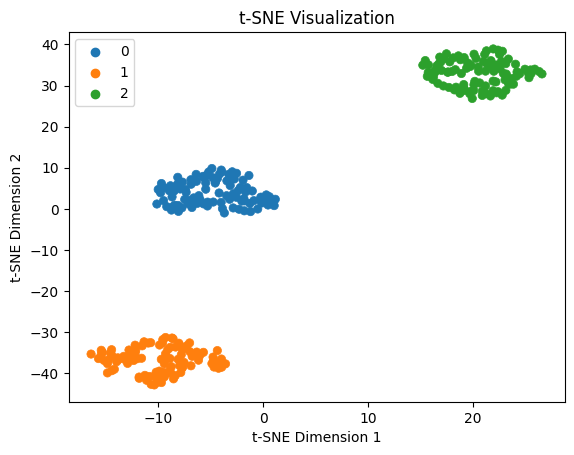

In [169]:
# Visualize the data points with their corresponding cluster assignments
t_sne_1 = X_tsne[:,0]
t_sne_2 = X_tsne[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2,hue = y, palette="tab10", edgecolor=None)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

In [170]:
k_mean = K_means(X, 3)

In [171]:
labels = k_mean.fit(max_iterations=150)

In [172]:
k_mean.centroids

array([[-8.55153217,  5.56895968],
       [ 9.62995258,  0.53947214],
       [-1.25879561,  4.38383338]])

In [173]:
# Use t-SNE for visualization
tsne = TSNE(n_components=2, random_state=7)
X_tsne = tsne.fit_transform(X)

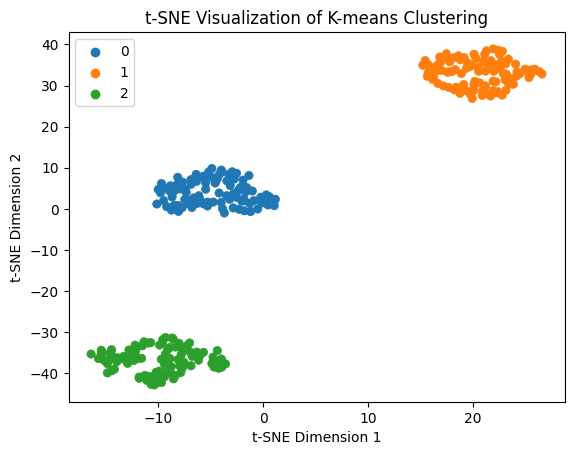

In [174]:
# Visualize the data points with their corresponding cluster assignments
t_sne_1 = X_tsne[:,0]
t_sne_2 = X_tsne[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2,hue = labels, palette="tab10", edgecolor=None)
plt.title('t-SNE Visualization of K-means Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

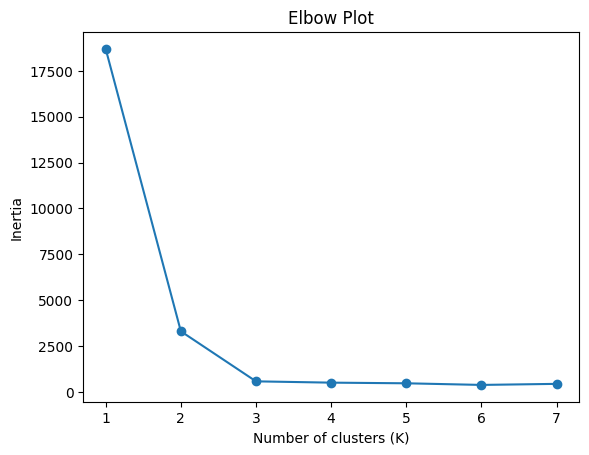

In [175]:
k_mean.elbow_plot(max_K=7)

- As you can observe from the elbow plot, the optimal number of clusters (K) that minimizes the inertia is 3.